<a href="https://colab.research.google.com/github/mdnm18/Advanced-Programming-Practice-Tutorials/blob/main/Network_programming_paradigm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Programming paradigm

The Network Programming Paradigm deals with writing programs that can communicate over a network.
It allows multiple processes (on the same or different machines) to exchange data using sockets.
Sockets

A socket is an endpoint for sending or receiving data across a network. A socket is like a door between two programs that want to talk to each other.

It is identified by:
1.   IP address
2.   Port number
3.   Protocol(TCP/UDP)

# Basic steps to use sockets:
1.   Create a socket
2.   Bind it to an IP and port (for server)
3.   Listen and accept connections (server)
4.   Connect to server (client)
5.   Send and receive data
6.   Close the socket
    
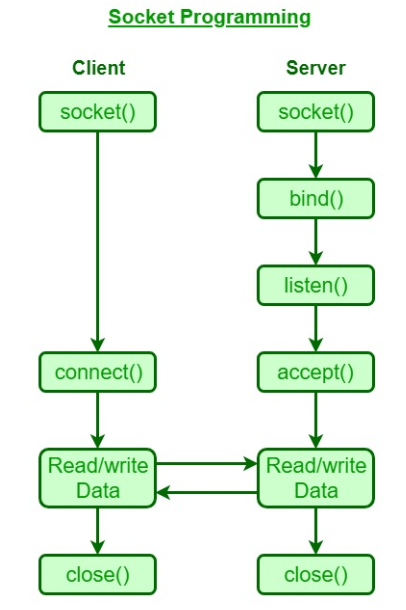

# Figure 1. Socket Programming

In [ ]:
import socket
import threading

# Server function
def server_program():
    host = '127.0.0.1'   # localhost
    port = 5000          # arbitrary non-privileged port
    server_socket = socket.socket()
    server_socket.bind((host, port))
    server_socket.listen(1)
    print("Server waiting for connection...")
    conn, address = server_socket.accept()
    print("Connection from:", address)

    data = conn.recv(1024).decode()
    print("Message from client:", data)

    conn.send("Hello from server!".encode())
    conn.close()

# Client function
def client_program():
    host = '127.0.0.1'
    port = 5000
    client_socket = socket.socket()
    client_socket.connect((host, port))
    client_socket.send("Hello from client!".encode())
    data = client_socket.recv(1024).decode()
    print("Message from server:", data)
    client_socket.close()

# Run server and client using threads
server_thread = threading.Thread(target=server_program)
server_thread.start()

client_thread = threading.Thread(target=client_program)
client_thread.start()

server_thread.join()
client_thread.join()


Server waiting for connection...
Connection from: ('127.0.0.1', 44752)
Message from client: Hello from client!
Message from server: Hello from server!


#Server Function

The server will listen on your computer (localhost).
Port 5000 is used for connection (any free number >1024 works).

1.   bind() attaches the server to the host and port.
2.   listen() makes the server ready to accept connections.
3.   accept() waits until a client connects.When connected, it returns a connection object (conn) and the client’s address.
4.   List item
5.   recv(1024) receives up to 1024 bytes of data from the client.
6.  decode() converts bytes to a string.
7. The server replies to the client.encode() converts text to bytes before sending.
8. Then closes the connection.

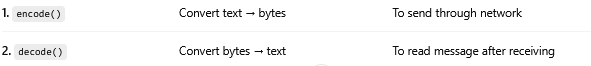
# Client function
1. The client connects to the server running on the same machine and port.
2. Client sends a message to the server.

# Running both together
1.Thread 1: runs server_program()

2.Thread 2: runs client_program()

3.join() ensures the main program waits until both finish.

In [ ]:
import socket
import threading
import time

def server_program():
    host = '127.0.0.1'
    port = 5002
    server_socket = socket.socket()
    server_socket.bind((host, port))
    server_socket.listen(1)
    print("Chat server running...")
    conn, addr = server_socket.accept()
    print("Connected by:", addr)

    while True:
        data = conn.recv(1024).decode()
        if not data or data.lower() == 'bye':
            print("Chat ended by client.")
            break
        print("Client:", data)
        # Simulate server response automatically
        conn.send(("Server received: " + data).encode())
    conn.close()

def client_program():
    time.sleep(1)  # <-- Wait 1 second to ensure server is ready
    host = '127.0.0.1'
    port = 5002
    client_socket = socket.socket()
    client_socket.connect((host, port))
    messages = ["Hello Server!", "How are you?", "bye"]
    for msg in messages:
        client_socket.send(msg.encode())
        data = client_socket.recv(1024).decode()
        print("Server:", data)
    client_socket.close()

# Run both using threads
server_thread = threading.Thread(target=server_program)
server_thread.start()

client_thread = threading.Thread(target=client_program)
client_thread.start()

server_thread.join()
client_thread.join()


Chat server running...
Connected by: ('127.0.0.1', 48216)
Client: Hello Server!
Server: Server received: Hello Server!
Client: How are you?
Server: Server received: How are you?
Chat ended by client.
Server: 


#Socket Types
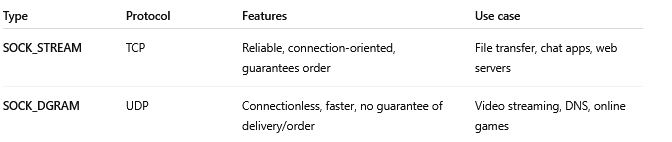

# Simple TCP program

In [ ]:
# Simple TCP program
import socket
import threading
import time

# TCP Server in a thread
def tcp_server():
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
    server_socket.bind(('localhost', 8888))
    server_socket.listen(1)
    print("TCP Server: Waiting for connections...")

    client_socket, client_address = server_socket.accept()
    print(f"TCP Server: Connected to {client_address}")

    # Receive data
    data = client_socket.recv(1024).decode()
    print(f"TCP Server received: {data}")

    # Send response
    client_socket.send("Hello from TCP Server!".encode())
    client_socket.close()
    server_socket.close()

# Start TCP server in background
server_thread = threading.Thread(target=tcp_server)
server_thread.daemon = True
server_thread.start()

# Give server time to start
time.sleep(1)

# TCP Client
def tcp_client():
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    client_socket.connect(('localhost', 8888))
    client_socket.send("Hello from TCP Client!".encode())
    response = client_socket.recv(1024).decode()
    print(f"TCP Client received: {response}")
    client_socket.close()

tcp_client()

TCP Server: Waiting for connections...
TCP Server: Connected to ('127.0.0.1', 40096)
TCP Server received: Hello from TCP Client!
TCP Client received: Hello from TCP Server!


# Simple UDP Program

In [ ]:
import socket
import threading
import time

# UDP Server
def udp_server():
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    server_socket.bind(('localhost', 9999))
    print("UDP Server: Waiting for messages...")

    while True:
        data, client_address = server_socket.recvfrom(1024)
        print(f"UDP Server received from {client_address}: {data.decode()}")

        if data.decode().lower() == 'exit':
            break

        # Echo back
        server_socket.sendto(f"Echo: {data.decode()}".encode(), client_address)

    server_socket.close()

# Start UDP server
udp_thread = threading.Thread(target=udp_server)
udp_thread.daemon = True
udp_thread.start()

time.sleep(1)

# UDP Client
def udp_client():
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

    messages = ["Hello UDP!", "How are you?", "exit"]

    for msg in messages:
        client_socket.sendto(msg.encode(), ('localhost', 9999))
        if msg != 'exit':
            response, server_address = client_socket.recvfrom(1024)
            print(f"UDP Client received: {response.decode()}")
        time.sleep(1)

    client_socket.close()

udp_client()

UDP Server: Waiting for messages...
UDP Server received from ('127.0.0.1', 59701): Hello UDP!
UDP Client received: Echo: Hello UDP!
UDP Server received from ('127.0.0.1', 59701): How are you?
UDP Client received: Echo: How are you?
UDP Server received from ('127.0.0.1', 59701): exit
